In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
DATA_FILE = os.path.join('../data', 'train.csv')

In [42]:
data = pd.read_csv(DATA_FILE, parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [43]:
data.iloc[0:5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [44]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration'],
      dtype='object')

In [46]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [47]:
data['pickup_datetime'][0]

Timestamp('2016-03-14 17:24:55')

In [67]:
data['pickup_hr'] = map(lambda dt: dt.hour, data['pickup_datetime'])
data['pickup_min'] = map(lambda dt: dt.minute, data['pickup_datetime'])
data['pickup_sec'] = map(lambda dt: dt.second, data['pickup_datetime'])
data['pickup_day'] = map(lambda dt: dt.dayofweek, data['pickup_datetime'])
data['pickup_date'] = map(lambda dt: dt.day, data['pickup_datetime'])
data['pickup_mon'] = map(lambda dt: dt.month, data['pickup_datetime'])
data['pickup_yr'] = map(lambda dt: dt.year, data['pickup_datetime'])

In [68]:
data['dropoff_hr'] = map(lambda dt: dt.hour, data['dropoff_datetime'])
data['dropoff_min'] = map(lambda dt: dt.minute, data['dropoff_datetime'])
data['dropoff_sec'] = map(lambda dt: dt.second, data['dropoff_datetime'])
data['dropoff_day'] = map(lambda dt: dt.dayofweek, data['dropoff_datetime'])
data['dropoff_date'] = map(lambda dt: dt.day, data['dropoff_datetime'])
data['dropoff_mon'] = map(lambda dt: dt.month, data['dropoff_datetime'])
data['dropoff_yr'] = map(lambda dt: dt.year, data['dropoff_datetime'])

In [70]:
data = data.assign(st_dist=lambda df: np.sqrt((df.pickup_longitude-df.dropoff_longitude)**2 + 
                                       (df.pickup_latitude-df.dropoff_latitude)**2))

In [71]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'pickup_hr', u'pickup_min', u'pickup_sec',
       u'pickup_day', u'pickup_date', u'pickup_mon', u'pickup_yr',
       u'dropoff_hr', u'dropoff_min', u'dropoff_sec', u'dropoff_day',
       u'dropoff_date', u'dropoff_mon', u'dropoff_yr', u'st_dist'],
      dtype='object')

In [75]:
%matplotlib inline

/Users/Sumukh/Workspace/.virtualenvs/taxi/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [76]:
from matplotlib import pyplot as plt

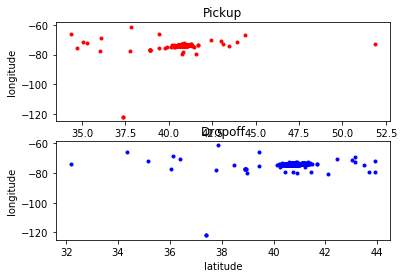

In [84]:
plt.subplot(2, 1, 1)
plt.plot(data['pickup_latitude'], data['pickup_longitude'], 'r.')
plt.ylabel('longitude')
plt.title('Pickup')
plt.subplot(2, 1, 2)
plt.plot(data['dropoff_latitude'], data['dropoff_longitude'], 'b.')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.title('Dropoff')
plt.show()

In [95]:
data['s_pickup_latitude'] = (data['pickup_latitude'] - data['pickup_latitude'].min())/(data['pickup_latitude'].max() - data['pickup_latitude'].min())
data['s_pickup_longitude'] = (data['pickup_longitude'] - data['pickup_longitude'].min())/(data['pickup_longitude'].max() - data['pickup_longitude'].min())

data['s_dropoff_latitude'] = (data['dropoff_latitude'] - data['dropoff_latitude'].min())/(data['dropoff_latitude'].max() - data['dropoff_latitude'].min())
data['s_dropoff_longitude'] = (data['dropoff_longitude'] - data['dropoff_longitude'].min())/(data['dropoff_longitude'].max() - data['dropoff_longitude'].min())

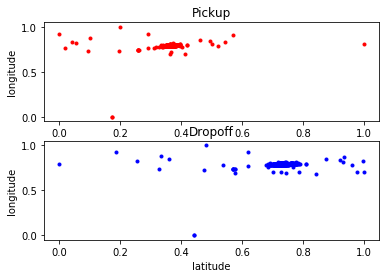

In [99]:
plt.subplot(2, 1, 1)
plt.plot(data['s_pickup_latitude'], data['s_pickup_longitude'], 'r.')
plt.ylabel('longitude')
plt.title('Pickup')
plt.subplot(2, 1, 2)
plt.plot(data['s_dropoff_latitude'], data['s_dropoff_longitude'], 'b.')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.title('Dropoff')
plt.show()

In [115]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'pickup_hr', u'pickup_min', u'pickup_sec',
       u'pickup_day', u'pickup_date', u'pickup_mon', u'pickup_yr',
       u'dropoff_hr', u'dropoff_min', u'dropoff_sec', u'dropoff_day',
       u'dropoff_date', u'dropoff_mon', u'dropoff_yr', u'st_dist',
       u's_pickup_latitude', u's_pickup_longitude', u's_dropoff_latitude',
       u's_dropoff_longitude', u'flag'],
      dtype='object')

In [113]:
data['flag'] = (data['store_and_fwd_flag'] == 'Y').astype(int)

In [118]:
features = data[['id', 'vendor_id', 'passenger_count',
       'trip_duration', 'pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon', 'pickup_yr',
       'dropoff_hr', 'dropoff_min', 'dropoff_sec', 'dropoff_day',
       'dropoff_date', 'dropoff_mon', 'dropoff_yr', 'st_dist',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag']]

In [119]:
features

,id,vendor_id,passenger_count,trip_duration,pickup_hr,pickup_min,pickup_sec,pickup_day,pickup_date,pickup_mon,...,dropoff_day,dropoff_date,dropoff_mon,dropoff_yr,st_dist,s_pickup_latitude,s_pickup_longitude,s_dropoff_latitude,s_dropoff_longitude,flag
0,id2875421,2,1,455,17,24,55,0,14,3,...,0,14,3,2016,0.017680,0.365738,0.791302,0.731222,0.791591,0
1,id2377394,1,1,663,0,43,35,6,12,6,...,6,12,6,2016,0.020456,0.364062,0.791331,0.728287,0.791016,0
2,id3858529,2,1,2124,11,35,24,1,19,1,...,1,19,1,2016,0.059934,0.365510,0.791354,0.726493,0.790920,0
3,id3504673,2,1,429,19,32,31,2,6,4,...,2,6,4,2016,0.013438,0.363001,0.790842,0.726206,0.790805,0
4,id2181028,2,1,435,13,30,55,5,26,3,...,5,26,3,2016,0.010690,0.367181,0.791452,0.732663,0.791454,0
5,id0801584,2,6,443,22,1,40,5,30,1,...,5,30,1,2016,0.011572,0.364269,0.791291,0.729823,0.791138,0
6,id1813257,1,4,341,22,34,59,4,17,6,...,4,17,6,2016,0.014133,0.365162,0.791519,0.731247,0.791711,0
7,id1324603,2,1,1551,7,54,58,5,21,5,...,5,21,5,2016,0.059801,0.367441,0.791515,0.730792,0.792287,0
8,id1301050,1,1,255,23,12,23,4,27,5,...,4,27,5,2016,0.014790,0.364052,0.791016,0.728429,0.791242,0
9,id0012891,2,1,1225,21,45,1,3,10,3,...,3,10,3,2016,0.046355,0.364391,0.791321,0.733299,0.791453,0


In [120]:
TRAIN_FEATURES = os.path.join('../data','train_features.csv')
features.to_csv(TRAIN_FEATURES, header=True, index=False)